In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [52]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64
(42000, 785)


label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [5]:
Y_train = train["label"]
X_train = train.drop(labels=["label"],axis=1)
# labellarƒ±m Ytrain oluyor geriye kalan pixellerde xtrain

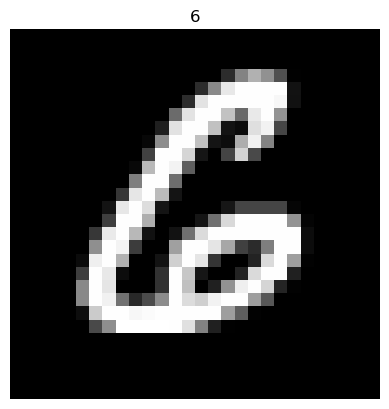

In [6]:
img = X_train.iloc[767].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap="gray")
plt.title(train.iloc[767,0]) # 767. satƒ±rƒ±ndaki 0. s√ºtunu alƒ±r yani label
plt.axis("off")
plt.show()

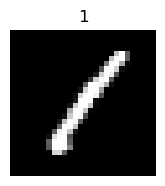

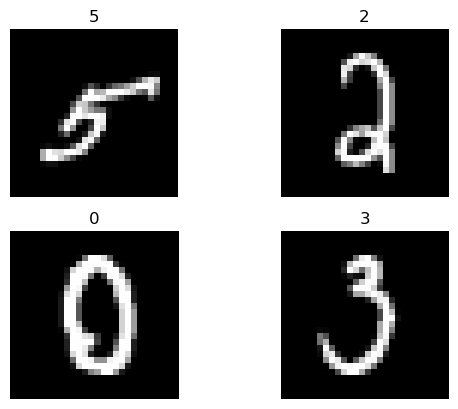

In [7]:
plt.subplot(2,3,1)
img = X_train.iloc[0].to_numpy().reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()


plt.subplot(2,2,1)
img1 = X_train.iloc[571].to_numpy().reshape(28,28)
plt.imshow(img1,cmap="gray")
plt.title(train.iloc[571,0])
plt.axis("off")

plt.subplot(2,2,2)
img2=X_train.iloc[572].to_numpy().reshape(28,28)
plt.imshow(img2,cmap="gray")
plt.title(train.iloc[572,0])
plt.axis("off")

plt.subplot(2,2,3)
img3=X_train.iloc[1881].to_numpy().reshape(28,28)
plt.imshow(img3,cmap="gray")
plt.title(train.iloc[1881,0])
plt.axis("off")

plt.subplot(2,2,4)
img4=X_train.iloc[2025].to_numpy().reshape(28,28)
plt.imshow(img4,cmap="gray")
plt.title(train.iloc[2025,0])
plt.axis("off")
plt.show()

<a id="2"></a>
## Normalizasyon, Yeniden ≈ûekillendirme ve Etiket Kodlama
* Normalizasyon
    * Aydƒ±nlatmadaki farklƒ±lƒ±klarƒ±n etkisini azaltmak i√ßin gri tonlama normalizasyonu yapƒ±yoruz.
    * Normalizasyon yaparsak, CNN daha hƒ±zlƒ± √ßalƒ±≈üƒ±r.
* Yeniden ≈ûekillendirme
    * Eƒüitim ve test g√∂r√ºnt√ºleri (28 x 28)
    * T√ºm verileri 28x28x1 3D matrislerine yeniden ≈üekillendiriyoruz.
    * Keras 28x28x1 ≈üeklinde √ßalƒ±≈üƒ±yor , 1 anlamƒ± grayscale , eƒüer 28x28 dersek keras bunu anlamaz 
    * Keras, kanallara kar≈üƒ±lƒ±k gelen son bir boyuta ihtiya√ß duyar. G√∂r√ºnt√ºlerimiz gri tonlamalƒ± olduƒüu i√ßin sadece bir kanal kullanƒ±lƒ±r.
* Etiket Kodlama  
    * Etiketleri one hot vekt√∂rlerine kodlayƒ±n
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]


In [8]:
X_train = X_train / 255.0
test = test / 255.0

print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [9]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)        
test = test.values.reshape(-1,28,28,1)   #√ñzetle, -1, dizinin bu boyutunu diƒüer verilen boyutlara g√∂re otomatik doldurur.
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [10]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train,num_classes=10)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,random_state=2,test_size=0.1)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


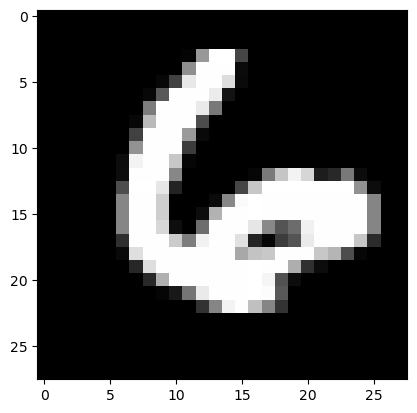

In [12]:
# Bazƒ± √∂rnekler
plt.imshow(X_train[2232][:,:,0],cmap='gray')
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())  #Batch Normalization, derin √∂ƒürenme modellerinin eƒüitim s√ºrecini optimize etmek i√ßin kullanƒ±lƒ±r.
model.add(Dropout(0.25))   # A≈ûIRI √ñƒûRENME OVERFƒ∞TTƒ∞NG AZALTIR

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [14]:
optimizer = Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

In [15]:
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [16]:
epochs = 20  # Sonu√ßlarƒ±n daha iyi olmasƒ± i√ßin epoch sayƒ±sƒ±nƒ± artƒ±rƒ±n
batch_size = 250

In [17]:

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 30)       120       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14, 14, 30)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 25)        6775      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 25)         0

In [18]:
# VERƒ∞ ARTTIRMA
# Veri artƒ±rma i≈ülemi
datagen = ImageDataGenerator(
        featurewise_center=False,  # veri seti √ºzerinde giri≈ü ortalamasƒ±nƒ± 0'a ayarla
        samplewise_center=False,  # her √∂rneƒüin ortalamasƒ±nƒ± 0'a ayarla
        featurewise_std_normalization=False,  # veri setinin std ile giri≈üleri b√∂l
        samplewise_std_normalization=False,  # her bir giri≈üi kendi std ile b√∂l
        zca_whitening=False,  # boyut azaltma i≈ülemi
        rotation_range=5,  # g√∂r√ºnt√ºleri rastgele 5 derece d√∂nd√ºr
        zoom_range = 0.1, # rastgele g√∂r√ºnt√ºleri %5 zoomla
        width_shift_range=0.1,  # g√∂r√ºnt√ºleri yatayda rastgele %5 kaydƒ±r
        height_shift_range=0.1,  # g√∂r√ºnt√ºleri dikeyde rastgele %5 kaydƒ±r
        horizontal_flip=False,  # g√∂r√ºnt√ºleri yatayda rastgele √ßevir
        vertical_flip=False)  # g√∂r√ºnt√ºleri dikeyde rastgele √ßevirme

datagen.fit(X_train)


In [19]:
history = model.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                             epochs=epochs,validation_data =(X_val,Y_val),steps_per_epoch=X_train.shape[0]// batch_size)

Epoch 1/20
151/151 [==============================] - 11s 67ms/step - loss: 0.7282 - accuracy: 0.7637 - val_loss: 2.7001 - val_accuracy: 0.2602
Epoch 2/20
151/151 [==============================] - 10s 67ms/step - loss: 0.2293 - accuracy: 0.9296 - val_loss: 2.0856 - val_accuracy: 0.4986
Epoch 3/20
151/151 [==============================] - 10s 66ms/step - loss: 0.1673 - accuracy: 0.9478 - val_loss: 0.6051 - val_accuracy: 0.8181
Epoch 4/20
151/151 [==============================] - 10s 67ms/step - loss: 0.1388 - accuracy: 0.9577 - val_loss: 0.1664 - val_accuracy: 0.9519
Epoch 5/20
151/151 [==============================] - 10s 68ms/step - loss: 0.1177 - accuracy: 0.9638 - val_loss: 0.0495 - val_accuracy: 0.9838
Epoch 6/20
151/151 [==============================] - 11s 70ms/step - loss: 0.1103 - accuracy: 0.9666 - val_loss: 0.0443 - val_accuracy: 0.9852
Epoch 7/20
151/151 [==============================] - 10s 67ms/step - loss: 0.1014 - accuracy: 0.9687 - val_loss: 0.0398 - val_accuracy:

In [20]:
score = model.evaluate(X_val,Y_val,verbose = 0)
print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1])

Test Loss :  0.02950618974864483
Test Accuracy :  0.991428554058075


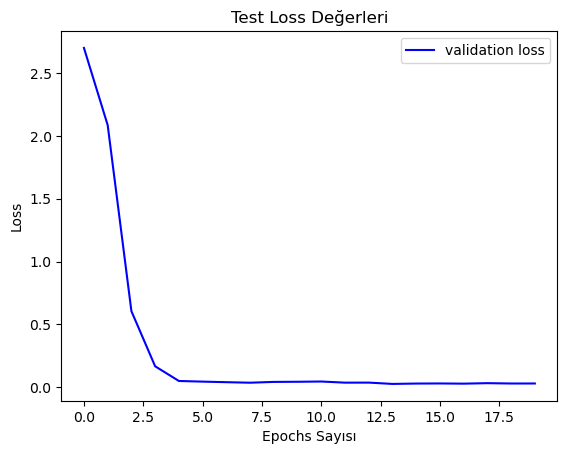

In [21]:
plt.plot(history.history["val_loss"],color="b",label="validation loss")
plt.plot(history.history["loss"],color="r",label="Train loss")
plt.title("Loss Deƒüerleri")
plt.xlabel("Epochs Sayƒ±sƒ±")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history["val_accuracy"],color="b",label="Validation acc")
plt.plot(history.history["accuracy"],color="r",label="Train acc")
plt.title("ACC Deƒüerleri")
plt.xlabel("Epochs Sayƒ±sƒ±")
plt.ylabel("Loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 13ms/step
Tahmin Edilen Sƒ±nƒ±f: 1


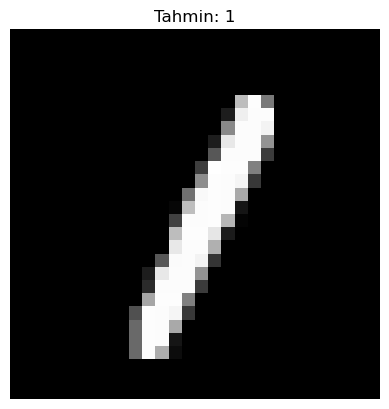

In [53]:
import random

# Test verisetiyle tahmin
index = random.randint(0, test.shape[0] - 1)  # Tahmin yapmak istediƒüiniz  rastgele bir indeks
sample_image = test[index]  # Test setinden bir √∂rnk

#  Modelle tahmin yapƒ±n
sample_image_reshaped = sample_image.reshape(-1, 28, 28, 1)  # Modelin girdi formatƒ±na uygun hale getirin
tahmin = model.predict(sample_image_reshaped)
sƒ±nƒ±f_tahmin = np.argmax(tahmin)  # En y√ºksek olasƒ±lƒ±ƒüa sahip sƒ±nƒ±fƒ± alma

#  Tahmini yazdƒ±rƒ±n
print(f"Tahmin Edilen Sƒ±nƒ±f: {sƒ±nƒ±f_tahmin}")

#  G√∂r√ºnt√ºy√º g√∂rselle≈ütirin
plt.imshow(sample_image[:, :, 0], cmap="gray")  # G√∂r√ºnt√ºy√º 28x28 formatƒ±nda g√∂sterme
plt.title(f"Tahmin: {sƒ±nƒ±f_tahmin}")
plt.axis("off")
plt.show()


1/1 [==============================] - 0s 13ms/step
Tahmin Edilen Sƒ±nƒ±f: 9
Ger√ßek Sƒ±nƒ±f: 9


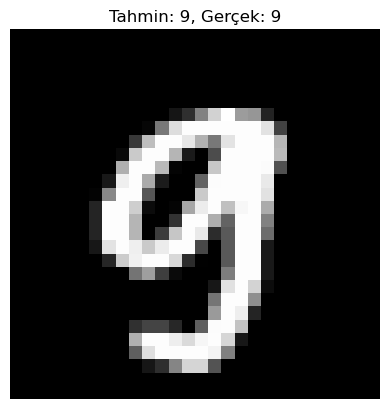

In [61]:
#  X_val'dan bir √∂rnek se√ßin ile tahmin
index = random.randint(0, X_val.shape[0] - 1) 
sample_image = X_val[index]  # X_val i√ßindeki bir √∂rnek


sample_image_reshaped = sample_image.reshape(-1, 28, 28, 1)  # Modelin girdi formatƒ±na uygun hale getirin
prediction = model.predict(sample_image_reshaped)
predicted_class = np.argmax(prediction)  # En y√ºksek olasƒ±lƒ±ƒüa sahip sƒ±nƒ±fƒ± alma

#  Orijinal etiketle kar≈üƒ±la≈ütƒ±ma
true_label = np.argmax(Y_val[index])  # Y_val i√ßindeki  etiket

#  Sonu√ßlarƒ± yazdƒ±rƒ±n
print(f"Tahmin Edilen Sƒ±nƒ±f: {predicted_class}")
print(f"Ger√ßek Sƒ±nƒ±f: {true_label}")

#  G√∂r√ºnt√ºy√º g√∂rselle≈ütirin
plt.imshow(sample_image[:, :, 0], cmap="gray")  
plt.title(f"Tahmin: {predicted_class}, Ger√ßek: {true_label}")
plt.axis("off")
plt.show()


132/132 [==============================] - 0s 2ms/step


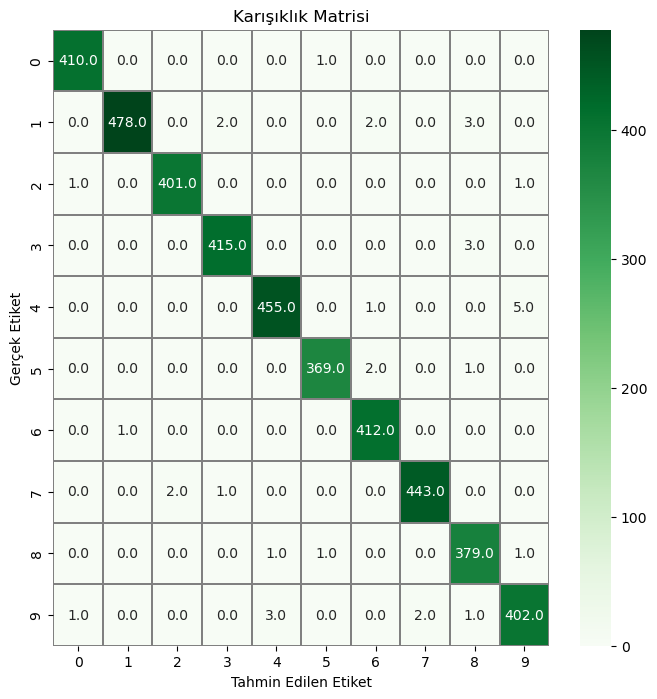

In [62]:
# Karƒ±≈üƒ±klƒ±k matrisi (Confusion Matrix)
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Doƒürulama veri setinden deƒüerleri tahmin et
Y_pred = model.predict(X_val)

# Tahmin sƒ±nƒ±flarƒ±nƒ± one hot vekt√∂rlerine d√∂n√º≈üt√ºr
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Doƒürulama g√∂zlemlerini one hot vekt√∂rlerine d√∂n√º≈üt√ºr
Y_true = np.argmax(Y_val, axis=1)

# Karƒ±≈üƒ±klƒ±k matrisini hesapla
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Karƒ±≈üƒ±klƒ±k matrisini √ßiz
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Ger√ßek Etiket")
plt.title("Karƒ±≈üƒ±klƒ±k Matrisi")
plt.show()


## 1. Sigmoid
Sigmoid fonksiyonu, √ßƒ±kƒ±≈ü deƒüeri olarak 0 ile 1 arasƒ±nda bir deƒüer √ºretir.
Avantajlarƒ±:

√áƒ±ktƒ±larƒ±, sƒ±nƒ±flandƒ±rma g√∂revlerinde olasƒ±lƒ±k olarak yorumlanabilir.
ƒ∞yi bir sƒ±nƒ±flandƒ±rma sƒ±nƒ±rƒ± saƒülar.
Dezavantajlarƒ±:

Vanishing Gradient (Kaybolan Gradyan): Sigmoid, √∂zellikle √ßok derin aƒülarda, gradyanlarƒ±n √ßok k√º√ß√ºk olmasƒ±na neden olabilir. Bu da √∂ƒürenme s√ºrecini zorla≈ütƒ±rƒ±r.
√áƒ±ktƒ± deƒüeri √ßok k√º√ß√ºk (0'a yakƒ±n) olduƒüunda, aƒüƒ±n √∂ƒürenmesi √ßok yava≈ülar.

Ne zaman kullanƒ±lƒ±r:

Binary sƒ±nƒ±flandƒ±rma problemlerinde (√∂rneƒüin, evet/hayƒ±r, 0/1) √ßƒ±kƒ±≈ü katmanƒ±nda kullanƒ±lƒ±r.

## 2. Tanh (Hiperbolik Tangent)
Tanh fonksiyonu, √ßƒ±kƒ±≈ü deƒüeri olarak -1 ile 1 arasƒ±nda bir deƒüer √ºretir.

√ñzellikler:

√áƒ±ktƒ±sƒ± -1 ile 1 arasƒ±nda sƒ±nƒ±rlƒ±dƒ±r.
√áoƒüunlukla sƒ±fƒ±r merkezli olduƒüu i√ßin, aƒüƒ±n √∂ƒürenmesi daha verimli olabilir.
Sigmoid'e benzer ancak daha geni≈ü bir aralƒ±kta √ßalƒ±≈üƒ±r.
Avantajlarƒ±:

Sƒ±fƒ±r merkezli olmasƒ±, √∂ƒürenme s√ºrecinde daha hƒ±zlƒ± bir hƒ±z saƒülar (negatif giri≈üler daha hƒ±zlƒ± √∂ƒürenilebilir).
Aktivasyonlar daha geni≈ü bir aralƒ±ƒüa sahiptir, bu da aƒüƒ±n daha g√º√ßl√º bir temsil g√ºc√º saƒülar.
Dezavantajlarƒ±:

Vanishing Gradient: Sigmoid gibi, Tanh fonksiyonu da √ßok k√º√ß√ºk gradyanlar √ºretebilir, bu da √∂zellikle derin aƒülarda √∂ƒürenmenin zorla≈ümasƒ±na neden olabilir.
√áƒ±kƒ±≈üƒ±n 1 veya -1‚Äôe √ßok yakƒ±n olmasƒ±, aƒüƒ±n √∂ƒürenmesini yava≈ülatabilir.
Ne zaman kullanƒ±lƒ±r:

Gizli katmanlarda genellikle kullanƒ±lƒ±r, √ß√ºnk√º sƒ±fƒ±r merkezli olmasƒ± √∂ƒürenme s√ºrecini iyile≈ütirir.


## 3. ReLU (Rectified Linear Unit)
ReLU, g√ºn√ºm√ºzde en pop√ºler aktivasyon fonksiyonlarƒ±ndan biridir.

√ñzellikler:

Pozitif giri≈üler i√ßin doƒürusal, negatif giri≈üler i√ßin sƒ±fƒ±r olan bir fonksiyondur.
√áok basit ve hesaplama a√ßƒ±sƒ±ndan verimlidir.
Avantajlarƒ±:

Vanishing Gradient Sorununa kar≈üƒ± daha dayanƒ±klƒ±dƒ±r, √ß√ºnk√º negatif deƒüerler dƒ±≈üƒ±nda gradyanlar kaybolmaz.
Hesaplama a√ßƒ±sƒ±ndan hƒ±zlƒ±dƒ±r ve eƒüitimde daha verimli sonu√ßlar verir.
Derin aƒülarda olduk√ßa iyi performans g√∂sterir.
Dezavantajlarƒ±:

Dead Neurons (√ñl√º N√∂ronlar): ReLU, negatif deƒüerler i√ßin sƒ±fƒ±r d√∂nd√ºrd√ºƒü√º i√ßin, bazƒ± n√∂ronlar "√∂l√º" hale gelebilir ve aƒüƒ±rlƒ±klarƒ± g√ºncellenmeyebilir. Bu, √∂zellikle y√ºksek √∂ƒürenme oranlarƒ± kullanƒ±ldƒ±ƒüƒ±nda meydana gelebilir.
Ne zaman kullanƒ±lƒ±r:

Gizli katmanlarda genellikle ReLU kullanƒ±lƒ±r, √∂zellikle derin aƒülar i√ßin.
Bu, √∂ƒürenme s√ºrecini hƒ±zlandƒ±ran ve performansƒ± artƒ±ran bir fonksiyondur.


## 4. Leaky ReLU
Leaky ReLU, ReLU‚Äônun modifiye edilmi≈ü bir versiyonudur.

√ñzellikler:

Negatif deƒüerler i√ßin k√º√ß√ºk bir eƒüim saƒülar (
ùõº
Œ± negatif b√∂lgeyi yumu≈üatƒ±r).
Bu, ReLU‚Äônun √∂l√º n√∂ron sorununu √ß√∂zmeye yardƒ±mcƒ± olabilir.
Avantajlarƒ±:

ReLU'nun √∂l√º n√∂ron problemini √ß√∂zer.
Eƒüitimde daha stabil sonu√ßlar verebilir.
Dezavantajlarƒ±:

Negatif deƒüerler i√ßin k√º√ß√ºk eƒüim hala var, ancak bu durumun tam anlamƒ±yla ReLU kadar etkili olup olmadƒ±ƒüƒ± tartƒ±≈ümalƒ±dƒ±r.
Ne zaman kullanƒ±lƒ±r:

Derin aƒülarda, ReLU'nun √∂l√º n√∂ron sorunu ya≈üandƒ±ƒüƒ±nda Leaky ReLU tercih edilebilir.


## 5. Softmax
Softmax, genellikle sƒ±nƒ±flandƒ±rma problemlerinde kullanƒ±lƒ±r ve √ßok sƒ±nƒ±flƒ± (multiclass) sƒ±nƒ±flandƒ±rmalarda tercih edilir. √áƒ±ktƒ±larƒ±, her sƒ±nƒ±fƒ±n olasƒ±lƒ±klarƒ±nƒ± verir ve bu olasƒ±lƒ±klarƒ±n toplamƒ± 1 olur.

√ñzellikler:

√áoklu sƒ±nƒ±flar i√ßin olasƒ±lƒ±klarƒ± normalize eder.
√áƒ±kƒ±≈ülar arasƒ±ndaki ili≈ükiyi yakalayarak her bir sƒ±nƒ±fƒ±n olasƒ±lƒ±ƒüƒ±nƒ± tahmin eder.
Avantajlarƒ±:

√áok sƒ±nƒ±flƒ± sƒ±nƒ±flandƒ±rma problemleri i√ßin uygundur.
√áƒ±ktƒ±larƒ±n olasƒ±lƒ±k gibi yorumlanabilmesi, sƒ±nƒ±flandƒ±rma kararlarƒ±nƒ± netle≈ütirir.
Dezavantajlarƒ±:

Yalnƒ±zca son katmanda kullanƒ±lƒ±r, √ß√ºnk√º her sƒ±nƒ±fƒ±n olasƒ±lƒ±ƒüƒ± gereklidir.
Ne zaman kullanƒ±lƒ±r:

√áok sƒ±nƒ±flƒ± sƒ±nƒ±flandƒ±rma problemlerinde (√∂rneƒüin, bir resmin hangi kategoriye ait olduƒüunu belirlemek) kullanƒ±lƒ±r.



## √ñzet
Sigmoid: ƒ∞kili sƒ±nƒ±flandƒ±rma i√ßin, ancak derin aƒülarda kaybolan gradyan sorununa yol a√ßabilir.
Tanh: Sƒ±fƒ±r merkezli, ancak yine de kaybolan gradyan sorunu olabilir. Gizli katmanlarda kullanƒ±mƒ± yaygƒ±ndƒ±r.
ReLU: Derin aƒülar i√ßin en pop√ºler se√ßimdir. Hesaplama a√ßƒ±sƒ±ndan hƒ±zlƒ±dƒ±r ve kaybolan gradyan sorununa kar≈üƒ± dayanƒ±klƒ±dƒ±r.
Leaky ReLU: ReLU'nun √∂l√º n√∂ron sorununu a≈ümak i√ßin kullanƒ±lƒ±r.
Softmax: √áoklu sƒ±nƒ±f sƒ±nƒ±flandƒ±rma problemleri i√ßin son katmanda kullanƒ±lƒ±r.